# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon
from utils import plot_longitudinal, get_diversity

# Compute GMHI2 scores

In [2]:
study = "P116"

In [3]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Hordeivirus|s__Barley_stripe_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN12478567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478598,0.185493,0.185493,0.185493,0.185493,0.185493,0.185493,0.185493,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
meta.head()

,health_status/host_diet,timepoint,GMHI2
Subject_ID,,,
NaN,Rectal adenocarcinoma,NaN,-3.131723
31,Rectal adenocarcinoma,1,-1.770976
38,Gastric Adenocarcinoma,2,-0.999625
NaN,Lung Adenocarcinoma,NaN,-3.588520
NaN,Hepatobiliary cell carcinoma,NaN,-1.616434


# Compute other indices

In [6]:
meta = get_diversity(meta, X)
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,Simpson Diversity
Subject_ID,,,,,,
NaN,Rectal adenocarcinoma,NaN,-3.131723,62,2.688974,0.093995
31,Rectal adenocarcinoma,1,-1.770976,51,2.318469,0.197680
38,Gastric Adenocarcinoma,2,-0.999625,89,2.980731,0.078974
NaN,Lung Adenocarcinoma,NaN,-3.588520,90,2.792643,0.079939
NaN,Hepatobiliary cell carcinoma,NaN,-1.616434,74,2.061727,0.305302


In [7]:
meta = meta[~meta["timepoint"].isna()]

In [8]:
meta.index = meta.index.map(lambda x : x[1:] if 'P' in x else x)
meta = meta.reset_index().set_index(["Subject_ID", "timepoint"], drop=False)
meta

,,Subject_ID,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,Simpson Diversity
Subject_ID,timepoint,,,,,,,
31,1,31,Rectal adenocarcinoma,1,-1.770976,51,2.318469,0.197680
38,2,38,Gastric Adenocarcinoma,2,-0.999625,89,2.980731,0.078974
49,2,49,Rectal adenocarcinoma,2,-1.761953,91,3.003410,0.052814
37,1,37,Hepatobiliary cell carcinoma,1,-1.420052,45,2.356173,0.170297
35,1,35,Lung Adenocarcinoma,1,-1.699935,30,2.004585,0.191493
...,...,...,...,...,...,...,...,...
22,2,22,Lung Adenocarcinoma,2,-3.075546,92,2.420233,0.176438
23,2,23,Lung Adenocarcinoma,2,-1.552622,29,1.843760,0.216081
24,2,24,Gastric Adenocarcinoma,2,-0.975134,46,1.422504,0.416539


In [9]:
# get specific drug info

more_meta = pd.read_csv(os.path.join(config.RAW_DIR, "P116_meta.csv"))
more_meta["timepoint"] = more_meta["sample"].apply(lambda x : str(x[-1]))
more_meta["Subject_ID"] = more_meta["patient id"].apply(lambda x : x[1:])
more_meta = more_meta.set_index(["Subject_ID", "timepoint"])
in_both = set(meta.index) & set(more_meta.index)

meta = meta.loc[in_both]
more_meta = more_meta.loc[in_both]

In [10]:
meta["drug"] = more_meta["Drugs"]
meta.index = meta.index.get_level_values(0)
meta.head()

,Subject_ID,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,Simpson Diversity,drug
Subject_ID,,,,,,,,
24,24,Gastric Adenocarcinoma,2,-0.975134,46,1.422504,0.416539,Oxaliplatin+5-Fu
63,63,Ovarian cancer,1,-1.275927,40,1.643196,0.394613,Oxaliplatin
4,4,Gastric Adenocarcinoma,1,-0.240933,81,2.990116,0.072613,5-Fu
26,26,Gastric Adenocarcinoma,2,-0.400774,85,3.079001,0.088086,Oxaliplatin+5-Fu
18,18,Gastric Adenocarcinoma,1,-1.574342,84,2.884963,0.088726,Oxaliplatin+5-Fu


# Plot stuff now 

In [11]:
meta["timepoint_plot"] = [int(time) - 1 for time in meta["timepoint"]]
meta.head()

,Subject_ID,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,Simpson Diversity,drug,timepoint_plot
Subject_ID,,,,,,,,,
24,24,Gastric Adenocarcinoma,2,-0.975134,46,1.422504,0.416539,Oxaliplatin+5-Fu,1
63,63,Ovarian cancer,1,-1.275927,40,1.643196,0.394613,Oxaliplatin,0
4,4,Gastric Adenocarcinoma,1,-0.240933,81,2.990116,0.072613,5-Fu,0
26,26,Gastric Adenocarcinoma,2,-0.400774,85,3.079001,0.088086,Oxaliplatin+5-Fu,1
18,18,Gastric Adenocarcinoma,1,-1.574342,84,2.884963,0.088726,Oxaliplatin+5-Fu,0


In [12]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()))
timepoints_sorted

['1', '2']

In [13]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [14]:
indices = ["GMHI2", "Species Richness", "Shannon Diversity", "Simpson Diversity"]

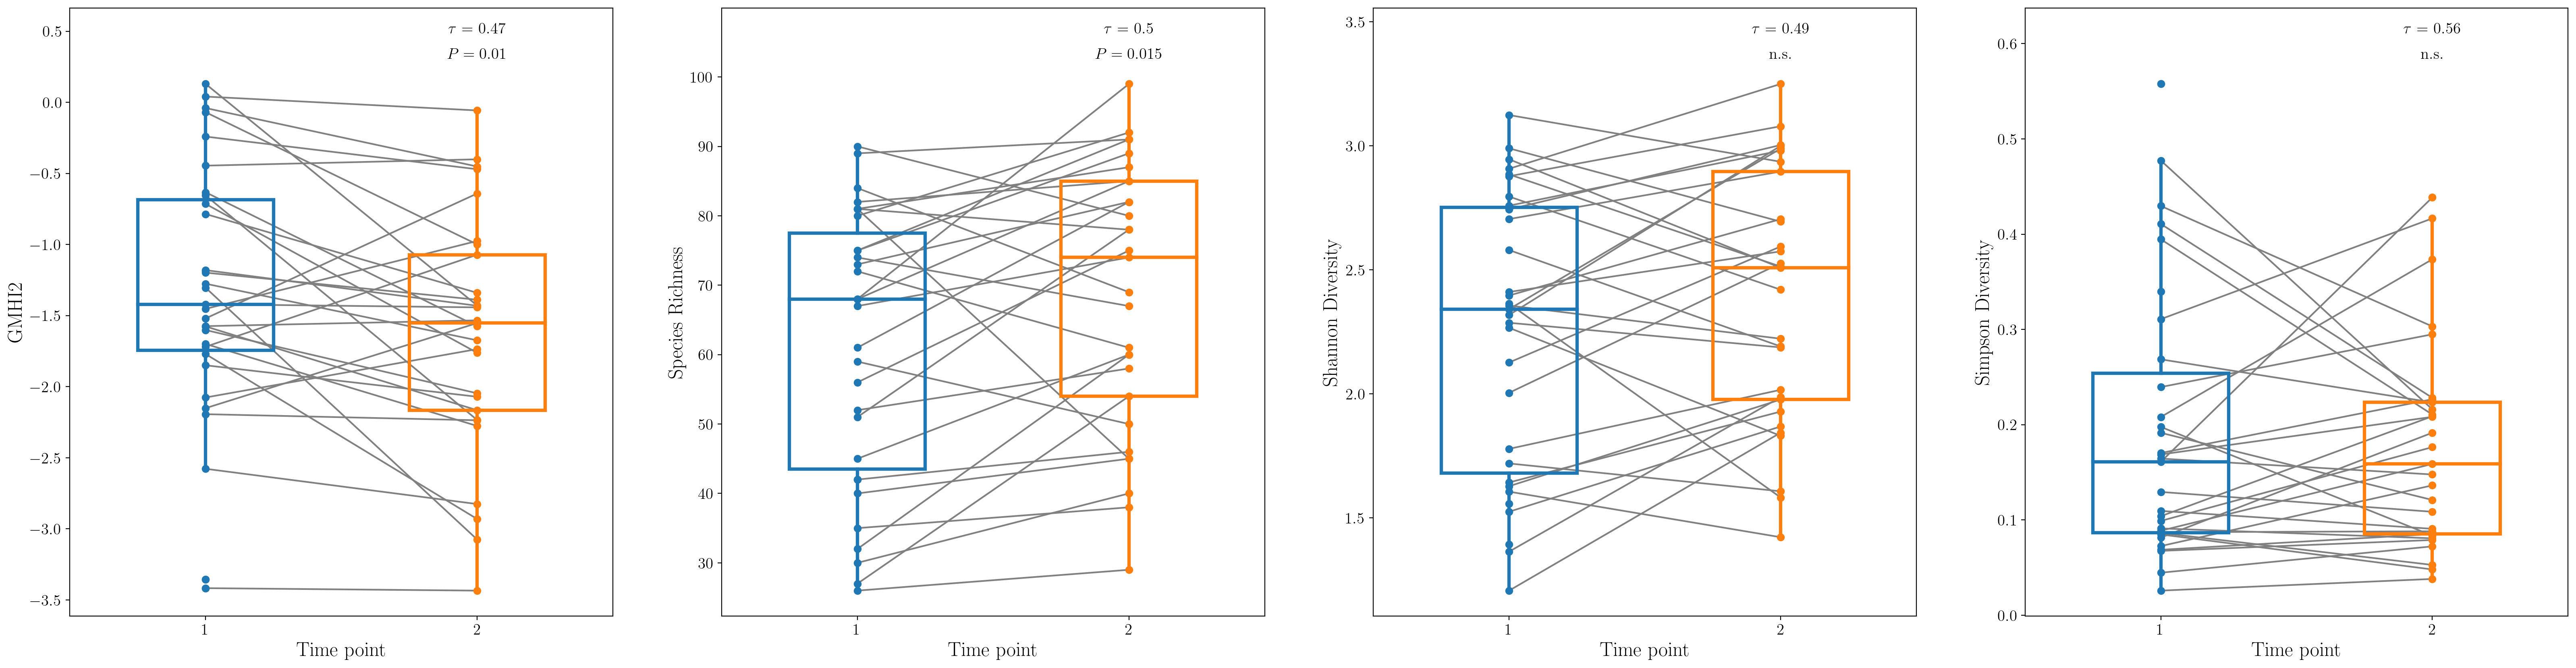

In [15]:
plot_longitudinal(meta, indices, timepoints_sorted, study, stars=False, show_tau=True)

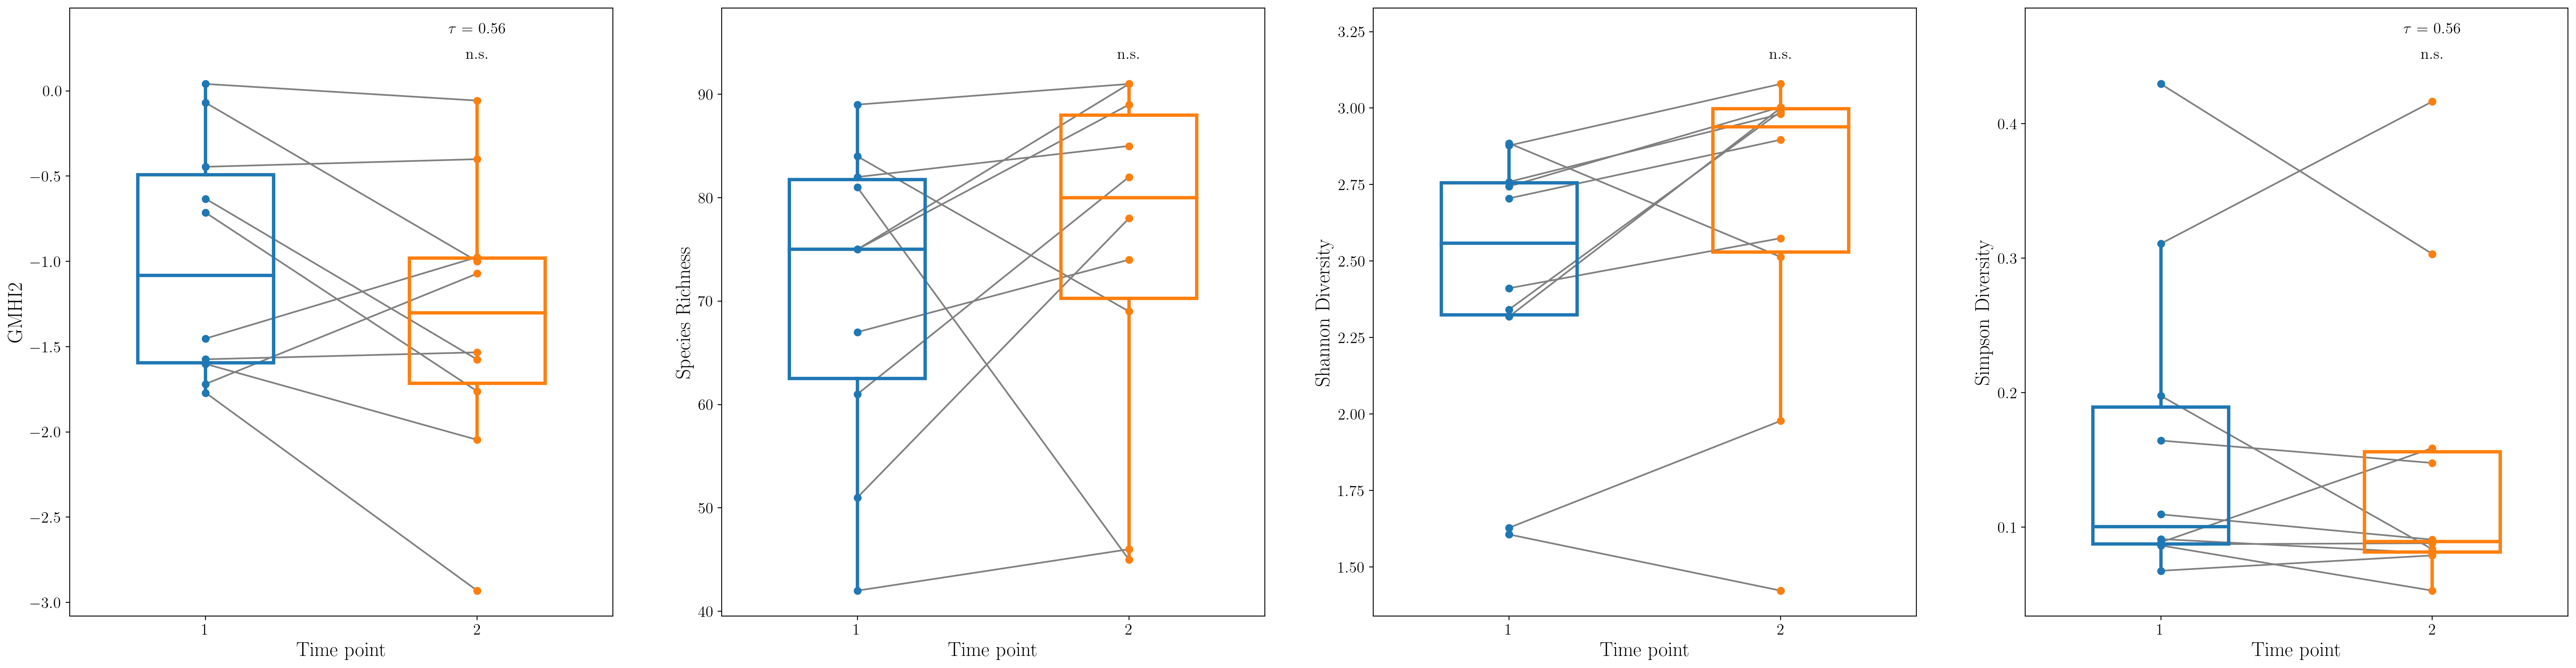

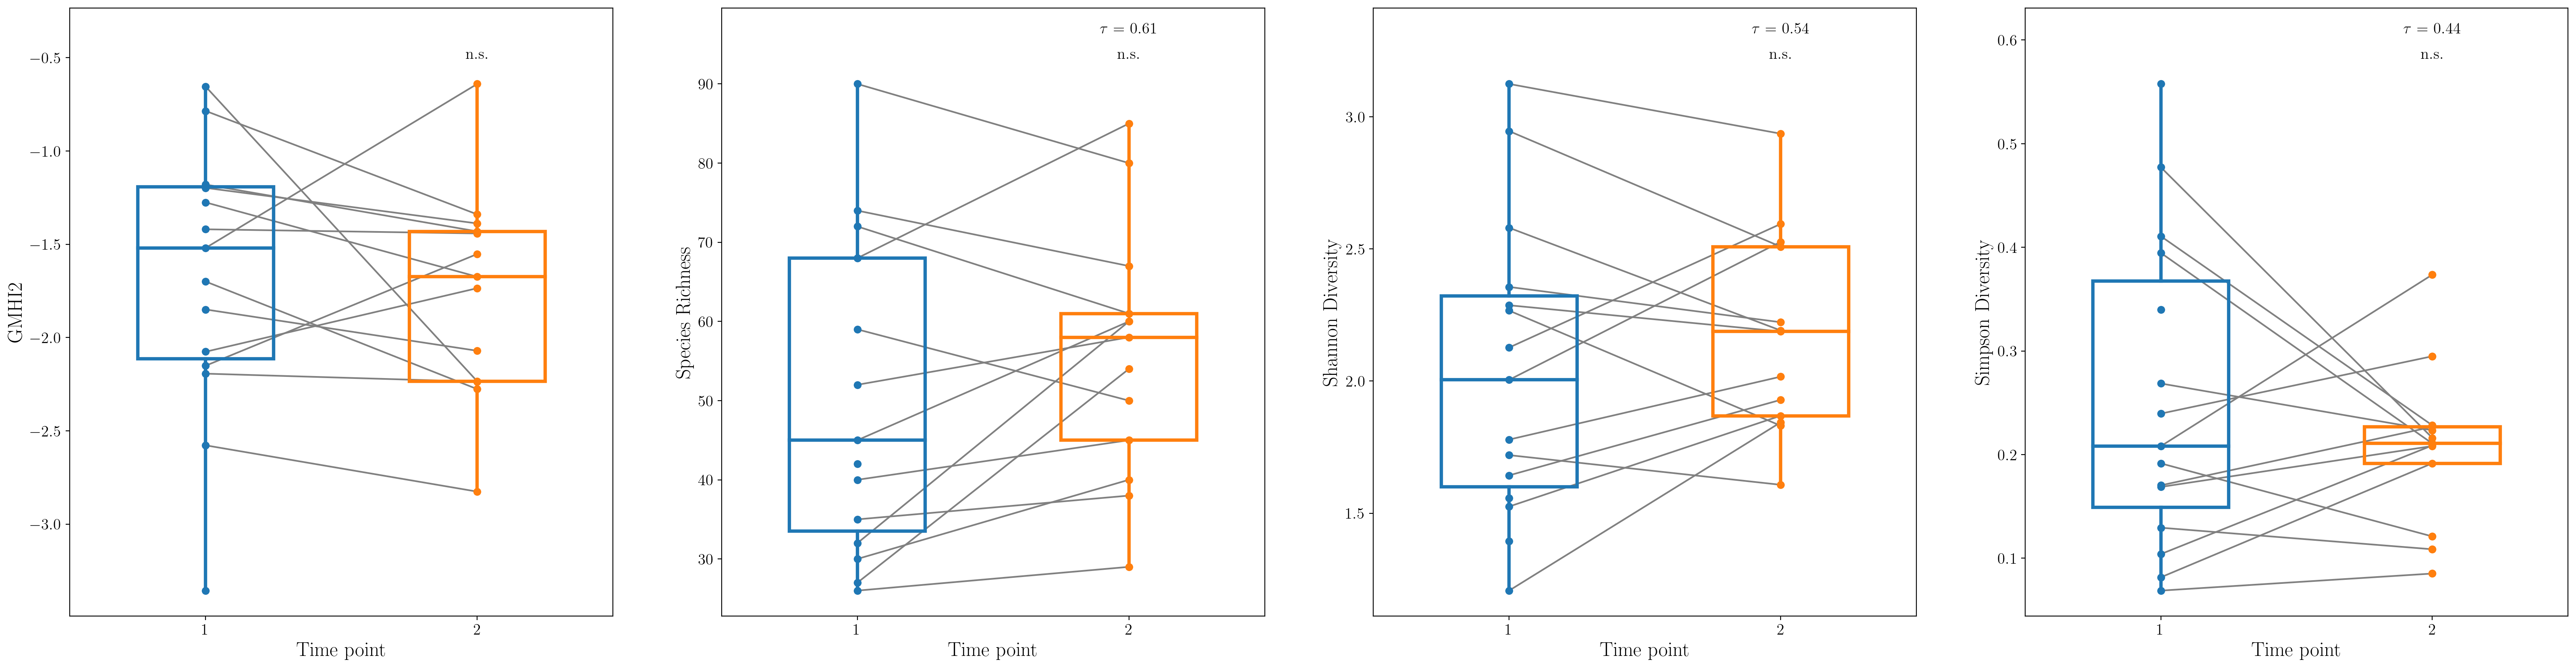

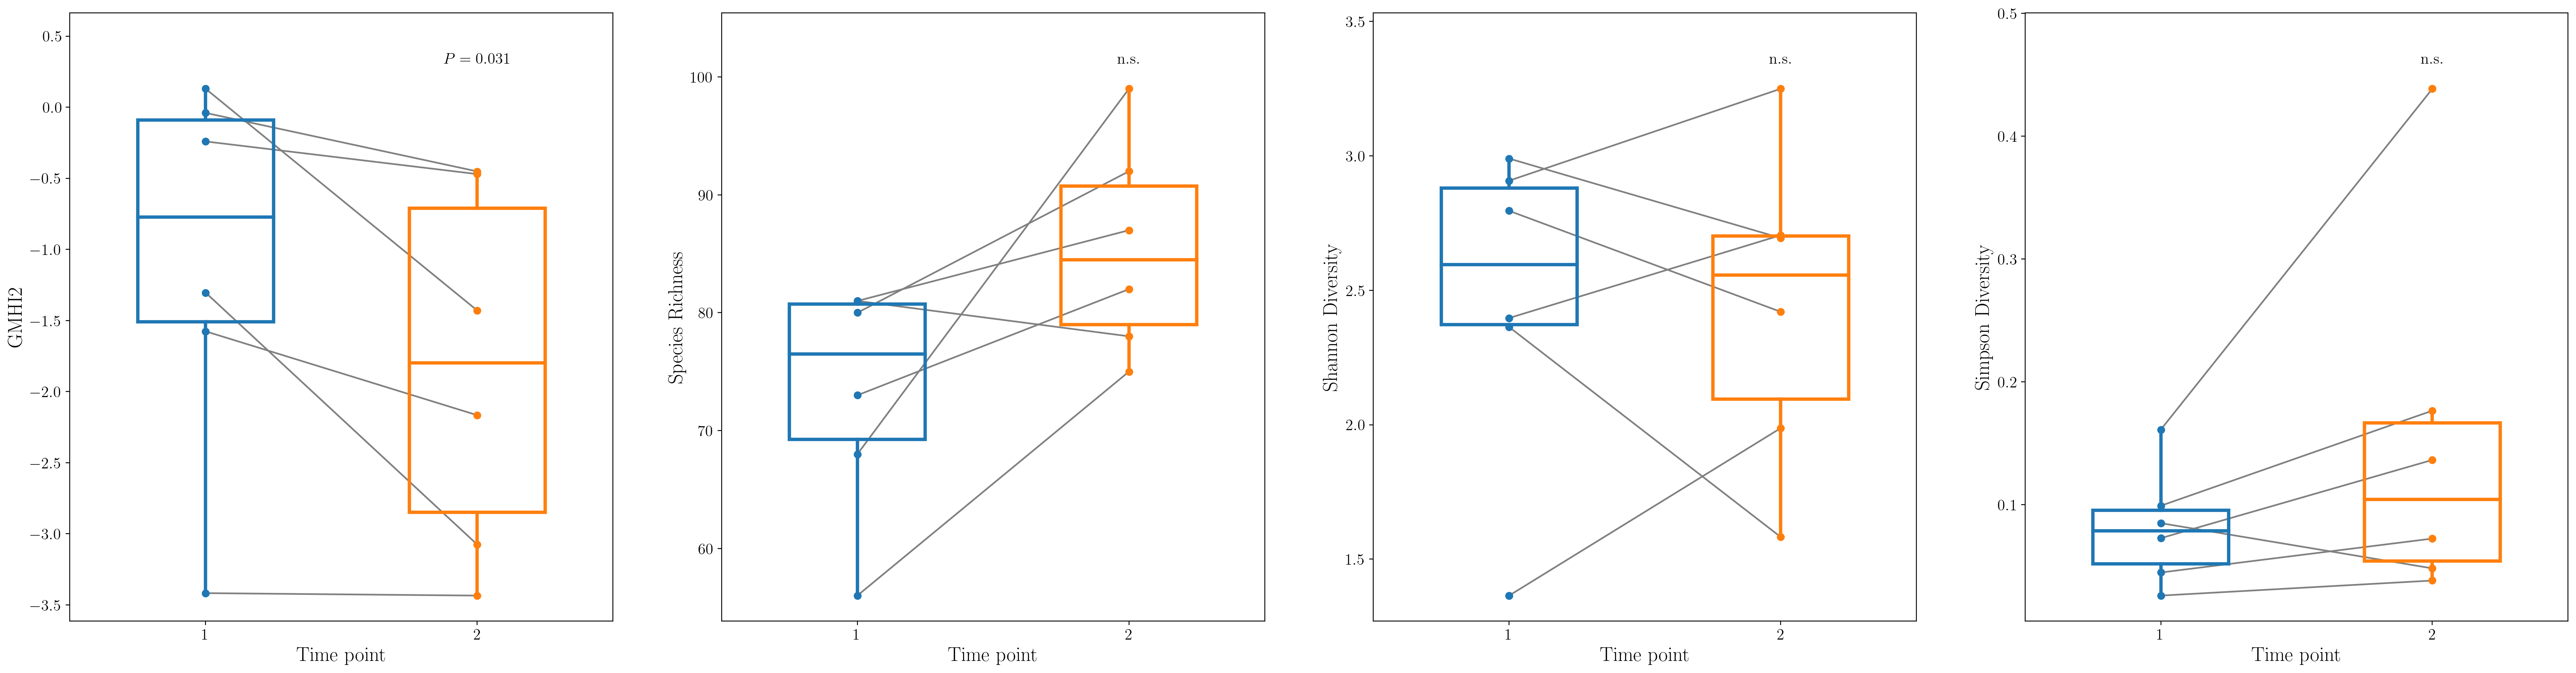

In [16]:
# split by drug
for drug in meta['drug'].unique():
    meta_curr = meta[meta["drug"] == drug]
    plot_longitudinal(meta_curr, indices, timepoints_sorted, study + "_" + drug, stars=False, show_tau=True)